In [1]:
# -*- coding: utf-8 -*-
import torch
import math
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.datasets import make_friedman1

# Exercici de Regressió

En aquest primer exercici el que es demana és que repetiu el mateix procés que el tutorial però en un problema una mica més complicat. La vostra xarxa haurà de tenir alguna capa més.

## Generació de les dades

Emprarem un conjunt de dades que s'autogenera a partir de certs paràmetres, la variable a predir es correspon amb la següent fórmula:

$y(X) = 10 * \sin(\pi * X[0] * X[1]) + 20 * (X[2] - 0.5)^2 + 10 * X[3] + 5 * X[4] + noise * N(0, 1).$

Com podeu observar tenim 5 variables útils i les altres que són independents de `y`.

[Més informació](https://projecteuclid.org/journals/annals-of-statistics/volume-19/issue-1/Multivariate-Adaptive-Regression-Splines/10.1214/aos/1176347963.full)

**ToDo**

-   En aquesta passa només heu de separar les dades en conjunt d'entrenament i test. Les etiquetes del conjunt de test s'han de dir `y_test`.


In [15]:
X, y = make_friedman1(n_samples=2000, n_features=10, noise=0.0, random_state=33)

X = torch.from_numpy(X)
y = torch.from_numpy(y)
X = X.float()
y = y.float()

train_data, test_data, train_pred, test_pred = train_test_split(
    X, y, test_size=0.33, random_state=42
)


def consume(iterator: iter):
    for item in iterator:
        item


consume(map(lambda x: print(x[:3]), [train_data, test_data, train_pred, test_pred]))

tensor([[0.8960, 0.5675, 0.5174, 0.0727, 0.0589, 0.1814, 0.6625, 0.0799, 0.6250,
         0.5706],
        [0.2243, 0.8191, 0.8394, 0.0718, 0.2894, 0.9238, 0.6548, 0.6373, 0.0239,
         0.0762],
        [0.6090, 0.2585, 0.7239, 0.7801, 0.2757, 0.1855, 0.0447, 0.7107, 0.3288,
         0.2159]])
tensor([[0.4797, 0.6600, 0.7291, 0.4464, 0.1414, 0.4084, 0.2764, 0.0905, 0.4450,
         0.6368],
        [0.8019, 0.7618, 0.0836, 0.6982, 0.9053, 0.5579, 0.7303, 0.9471, 0.3605,
         0.3795],
        [0.3726, 0.7179, 0.9301, 0.0667, 0.9722, 0.7588, 0.5675, 0.0341, 0.2206,
         0.4544]])
tensor([11.0244,  9.9256, 14.9295])
tensor([14.6066, 24.3752, 16.6766])


## Definició de la xarxa

**ToDo**

-   Heu de definir la xarxa amb la qual voleu treballar, provau amb diferents arquitectures.
-   Heu de definir la funció de pèrdua, podeu emprar MSE.


In [161]:
model = torch.nn.Sequential(
    torch.nn.Linear(10,15),
    torch.nn.ReLU(),
    torch.nn.Linear(15,3),
    torch.nn.ReLU(),
    torch.nn.Linear(3,1),
    torch.nn.Flatten(0,1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)

## Entrenament

En aquesta part heu de definir el bucle d'entrenament:

**ToDo**

-   Predicció.
-   Càlcul de la funció de pèrdua.
-   Càlcul del descens del gradient.

Volem veure un gràfic on es mostri el valor de la funció de pèrdua pel conjunt d'entrenament i del conjunt de test a cada iteració.


In [175]:
def simple_train(model, optimizer_fn, loss_fn, n_epochs, data, labels):
    model.train()

    losses = np.zeros(n_epochs)

    for epoch in range(n_epochs):
        epoch_pred = model(data)

        loss = loss_fn(epoch_pred, labels)

        losses[epoch] = loss.item()

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            optimizer.step()

    return losses


# Reset previous runs for the model, and optimizer
optimizer.zero_grad()

layers_to_reset = filter(
    lambda layer: hasattr(layer, "reset_parameters"), model.children()
)

for layer in layers_to_reset:
    layer.reset_parameters()

simple_train(
    model=model,
    optimizer_fn=optimizer,
    loss_fn=loss_fn,
    n_epochs=6000,
    data=train_data,
    labels=train_pred,
)

array([333568.        , 331332.4375    , 329159.1875    , ...,
         3808.31054688,   3807.82763672,   3807.34521484])

## Resultats

**ToDo**

-   Dibuixar el gràfic emprant un gràfic on podrem comparar com de bons són els nostres resultats respecte els


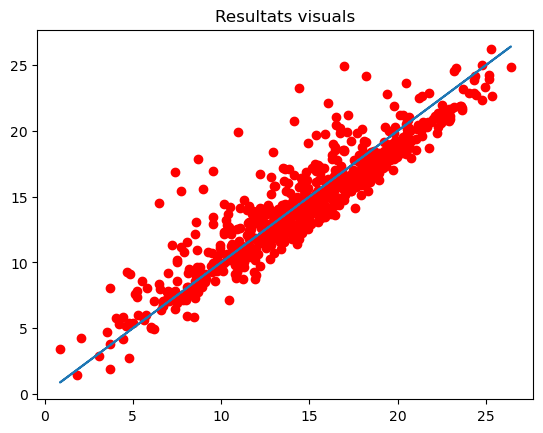

In [176]:
model.eval()
prediction = model(test_data)

plt.title("Resultats visuals")
plt.scatter(test_pred, prediction.detach().numpy(), c="red")
plt.plot(test_pred, test_pred)
plt.show()